------------------------------------------------------------
True mean (mu): 2
Confidence level: 95.0%
Number of intervals simulated: 100
Number of intervals containing mu: 93
Fraction containing mu: 0.930
Expected (theoretical) coverage: 0.95
------------------------------------------------------------


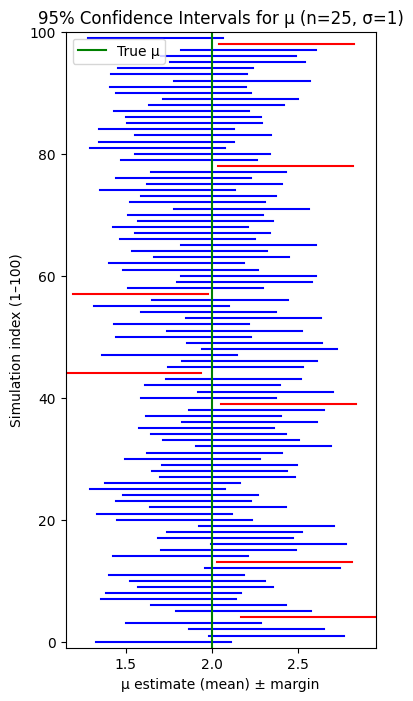

In [11]:
# Problem 1 – Simulating Confidence Intervals

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Parameters
n = 25           # sample size (number of observations per interval)
mu = 2           # true expected value
sigma = 1        # true standard deviation
alpha = 0.05     # significance level → confidence level = 1 - alpha = 0.95
m = 100          # number of simulated intervals

# Step 1: Simulate data
# Each of the m rows is a separate random sample of size n
x = stats.norm.rvs(loc=mu, scale=sigma, size=(m, n))

# Step 2: Compute sample means for each of the m samples
xbar = np.mean(x, axis=1)

# Step 3: Compute standard deviation of the mean
# Known sigma case: standard error = sigma / sqrt(n)
D = sigma / np.sqrt(n)

# Step 4: Find the critical value for the desired confidence level
# For a normal distribution, two-sided critical value:
lambda_alpha_2 = stats.norm.ppf(1 - alpha / 2)

# Step 5: Compute lower and upper confidence bounds
lower = xbar - lambda_alpha_2 * D
upper = xbar + lambda_alpha_2 * D

# Step 6: Determine which intervals contain the true μ
contains_mu = (lower <= mu) & (upper >= mu)
count_contain_mu = np.sum(contains_mu)

# Step 7: Print results
print("------------------------------------------------------------")
print(f"True mean (mu): {mu}")
print(f"Confidence level: {100*(1-alpha):.1f}%")
print(f"Number of intervals simulated: {m}")
print(f"Number of intervals containing mu: {count_contain_mu}")
print(f"Fraction containing mu: {count_contain_mu/m:.3f}")
print(f"Expected (theoretical) coverage: {1-alpha:.2f}")
print("------------------------------------------------------------")

# Step 8: Plot all confidence intervals
plt.figure(figsize=(4, 8))  # width=4 inches, height=8 inches

for k in range(m):
    if contains_mu[k]:
        color = 'b'   # blue if interval includes mu
    else:
        color = 'r'   # red if interval misses mu
    plt.plot([lower[k], upper[k]], [k, k], color)

# Step 9: Plot true value as vertical green line
plt.plot([mu, mu], [-1, m], 'g', label='True μ')

# Step 10: Adjust axis limits for better visualization
b_min = np.min(lower)
b_max = np.max(upper)
plt.axis([b_min, b_max, -1, m])

# Step 11: Add labels and show
plt.xlabel("μ estimate (mean) ± margin")
plt.ylabel("Simulation index (1–100)")
plt.title(f"95% Confidence Intervals for μ (n={n}, σ={sigma})")
plt.legend()
plt.show()

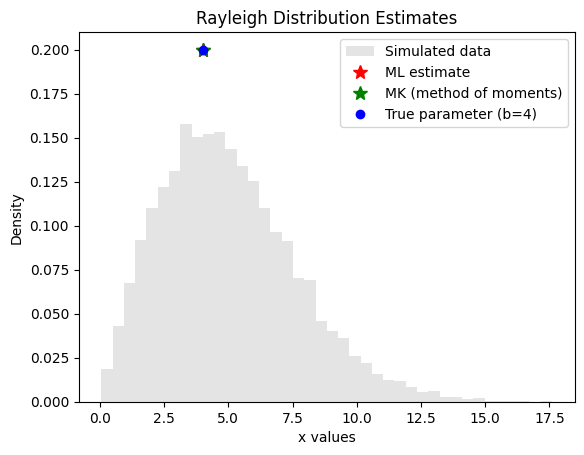

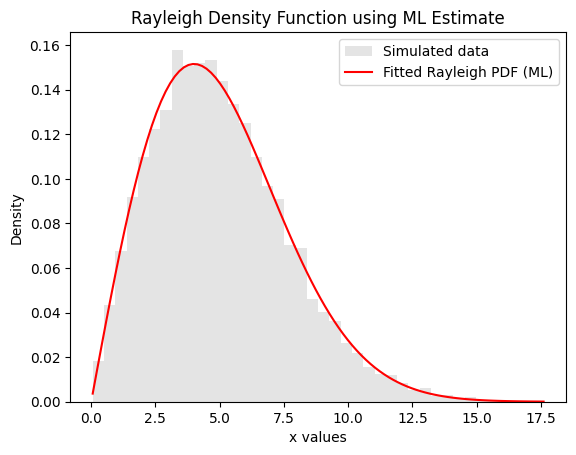

True parameter (b): 4
ML estimate (est_ml): 4.0017
MK estimate (est_mk): 4.0027


In [2]:
# Problem 2: Maximum likelihood, least squares

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Given parameters
M = 10000     # Number of simulated samples
b = 4         # True parameter (Rayleigh scale parameter)

# Generate Rayleigh-distributed random variables
x = stats.rayleigh.rvs(scale=b, size=M)

# Maximum Likelihood (ML) Estimate
# For Rayleigh: ML estimator = sqrt((1/(2M)) * sum(x_i^2))
est_ml = np.sqrt(np.mean(x**2) / 2)

# Method of Moments (MK or LS) Estimate
# Method of moments: mean = b * sqrt(pi/2) → b = mean / sqrt(pi/2)
est_mk = np.mean(x) / np.sqrt(np.pi / 2)

# Plot histogram and estimates
plt.figure()
plt.hist(x, 40, density=True, alpha=0.6, color='lightgray', label='Simulated data')

# Plot markers for estimates and true value
plt.plot(est_ml, 0.2, 'r*', markersize=10, label='ML estimate')
plt.plot(est_mk, 0.2, 'g*', markersize=10, label='MK (method of moments)')
plt.plot(b, 0.2, 'bo', label='True parameter (b=4)')

plt.xlabel('x values')
plt.ylabel('Density')
plt.legend()
plt.title('Rayleigh Distribution Estimates')
plt.show()

# Check density function using ML estimate
plt.figure()
plt.hist(x, 40, density=True, alpha=0.6, color='lightgray', label='Simulated data')

x_grid = np.linspace(np.min(x), np.max(x), 100)
pdf_ml = stats.rayleigh.pdf(x_grid, scale=est_ml)
plt.plot(x_grid, pdf_ml, 'r', label='Fitted Rayleigh PDF (ML)')

plt.xlabel('x values')
plt.ylabel('Density')
plt.legend()
plt.title('Rayleigh Density Function using ML Estimate')
plt.show()

# Print the estimated values
print(f"True parameter (b): {b}")
print(f"ML estimate (est_ml): {est_ml:.4f}")
print(f"MK estimate (est_mk): {est_mk:.4f}")



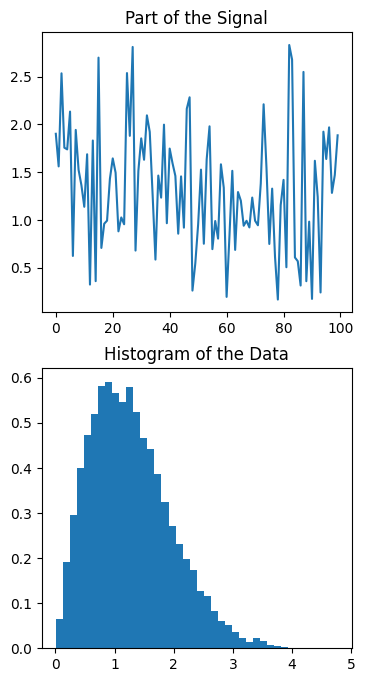

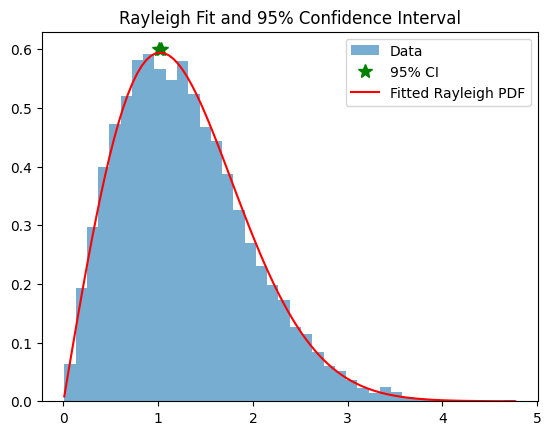

Estimated parameter (b): 1.020
95% Confidence Interval: (1.010, 1.030)


In [3]:
# Problem 3

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load and plot the data
y = np.loadtxt('wave_data.txt')

plt.figure(figsize=(4, 8))
plt.subplot(2, 1, 1)
plt.plot(y[:100])                # Plot first 100 samples of the signal
plt.title('Part of the Signal')

plt.subplot(2, 1, 2)
plt.hist(y, bins=40, density=True)
plt.title('Histogram of the Data')
plt.show()

# Estimate the Rayleigh parameter (using MLE)
# MLE for Rayleigh: b_hat = sqrt(sum(y^2) / (2 * n))
n = len(y)
est = np.sqrt(np.sum(y**2) / (2 * n))

# Compute a 95% confidence interval for b
# Approximate standard error: b / sqrt(2n)
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)
se = est/(2*np.sqrt(n))
lower_bound = est - z * se
upper_bound = est + z * se

# Plot histogram with confidence interval and fitted PDF
plt.figure()
plt.hist(y, bins=40, density=True, alpha=0.6, label='Data')

# Plot confidence interval markers
plt.plot([lower_bound, upper_bound], [0.6, 0.6], 'g*', markersize=10, label='95% CI')

# Plot fitted Rayleigh PDF
x_grid = np.linspace(np.min(y), np.max(y), 100)
pdf = stats.rayleigh.pdf(x_grid, scale=est)
plt.plot(x_grid, pdf, 'r', label='Fitted Rayleigh PDF')

plt.legend()
plt.title('Rayleigh Fit and 95% Confidence Interval')
plt.show()

# Print results
print(f"Estimated parameter (b): {est:.3f}")
print(f"95% Confidence Interval: ({lower_bound:.3f}, {upper_bound:.3f})")



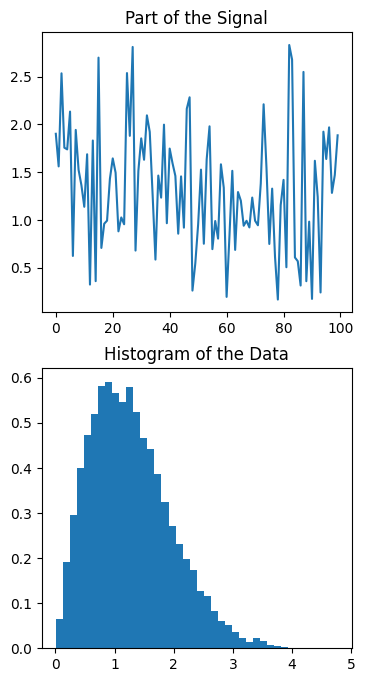

n = 10000
MLE estimate: 1.0204674492113197
Exact 95% CI (chi2):       (1.0106, 1.0306)
Asymptotic 95% CI (normal): (1.0105, 1.0305)


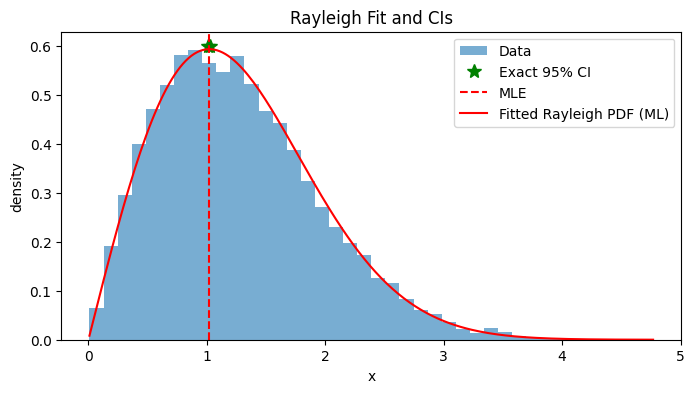

KS on transformed data (approx): stat=0.0165, p=0.0088


In [12]:
# Problem 3 (Updated)

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Load and plot the data
y = np.loadtxt('wave_data.txt')

plt.figure(figsize=(4, 8))
plt.subplot(2, 1, 1)
plt.plot(y[:100])                # Plot first 100 samples of the signal
plt.title('Part of the Signal')

plt.subplot(2, 1, 2)
plt.hist(y, bins=40, density=True)
plt.title('Histogram of the Data')
plt.show()

# assume y already loaded
n = len(y)
S = np.sum(y**2)
alpha = 0.05
z = stats.norm.ppf(1 - alpha/2)

est = np.sqrt(np.sum(y**2) / (2 * n))

# Exact chi-square CI (recommended)
chi2_low = stats.chi2.ppf(alpha/2, df=2*n)        # small quantile
chi2_high = stats.chi2.ppf(1 - alpha/2, df=2*n)   # large quantile
lower_exact = np.sqrt(S / chi2_high)
upper_exact = np.sqrt(S / chi2_low)

# Asymptotic normal CI (ML asymptotic se)
se_ml = est / (2 * np.sqrt(n))   # correct asymptotic SE for ML estimator
lower_asym = est - z * se_ml
upper_asym = est + z * se_ml

# Print all
print("n =", n)
print("MLE estimate:", est)
print("Exact 95% CI (chi2):       ({:.4f}, {:.4f})".format(lower_exact, upper_exact))
print("Asymptotic 95% CI (normal): ({:.4f}, {:.4f})".format(lower_asym, upper_asym))

# Plot histogram with exact CI markers and fitted PDF
plt.figure(figsize=(8,4))
plt.hist(y, bins=40, density=True, alpha=0.6, label='Data')

# markers
plt.plot([lower_exact, upper_exact], [0.60, 0.60], 'g*', markersize=10, label='Exact 95% CI')
plt.axvline(est, color='r', linestyle='--', label='MLE')

# fitted pdf
x_grid = np.linspace(np.min(y), np.max(y), 200)
pdf_ml = stats.rayleigh.pdf(x_grid, scale=est)
plt.plot(x_grid, pdf_ml, 'r', label='Fitted Rayleigh PDF (ML)')

plt.legend()
plt.title('Rayleigh Fit and CIs')
plt.xlabel('x')
plt.ylabel('density')
plt.show()

# Simple goodness-of-fit: transform to uniform via CDF and do K-S test
u = 1 - np.exp(-y**2/(2 * est**2))   # theoretical CDF under Rayleigh(est)
ks_stat, ks_p = stats.kstest(u, 'uniform')
print("KS on transformed data (approx): stat={:.4f}, p={:.4f}".format(ks_stat, ks_p))

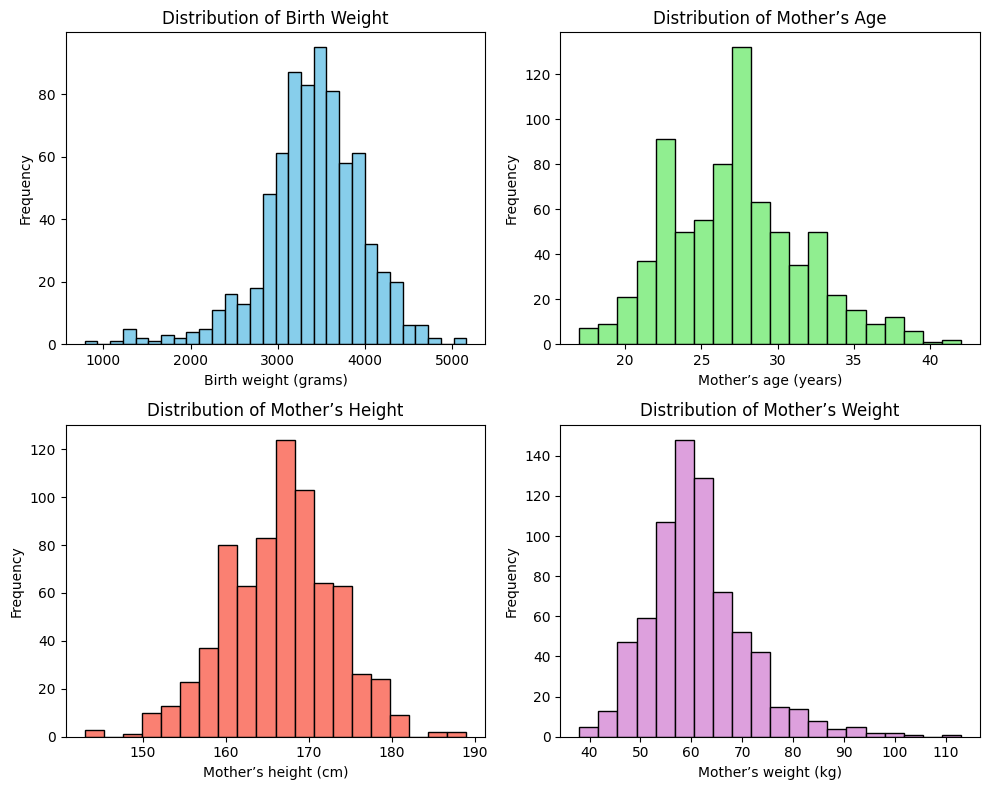

In [5]:
# Problem 4

import numpy as np
import matplotlib.pyplot as plt

# Load the data
birth = np.loadtxt('birth.dat')

# Extract the variables using correct column indices
birth_weight = birth[:, 2]   # Column 3
mother_age = birth[:, 3]     # Column 4
mother_height = birth[:, 15] # Column 16
mother_weight = birth[:, 14] # Column 15

# Remove NaN (missing values) from each vector
birth_weight = birth_weight[~np.isnan(birth_weight)]
mother_age = mother_age[~np.isnan(mother_age)]
mother_height = mother_height[~np.isnan(mother_height)]
mother_weight = mother_weight[~np.isnan(mother_weight)]

# Create the figure with four subplots
plt.figure(figsize=(10, 8))

# 1. Child's birth weight
plt.subplot(2, 2, 1)
plt.hist(birth_weight, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Birth weight (grams)')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Weight')

# 2. Mother’s age
plt.subplot(2, 2, 2)
plt.hist(mother_age, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Mother’s age (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Mother’s Age')

# 3. Mother’s height
plt.subplot(2, 2, 3)
plt.hist(mother_height, bins=20, color='salmon', edgecolor='black')
plt.xlabel('Mother’s height (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Mother’s Height')

# 4. Mother’s weight
plt.subplot(2, 2, 4)
plt.hist(mother_weight, bins=20, color='plum', edgecolor='black')
plt.xlabel('Mother’s weight (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Mother’s Weight')

plt.tight_layout()
plt.show()


Sample sizes: non-smokers n_x = 519 , smokers n_y = 222
non-smokers: mean=3443.7, median=3460.0, sd=550.1
smokers:     mean=3299.0, median=3345.0, sd=599.5


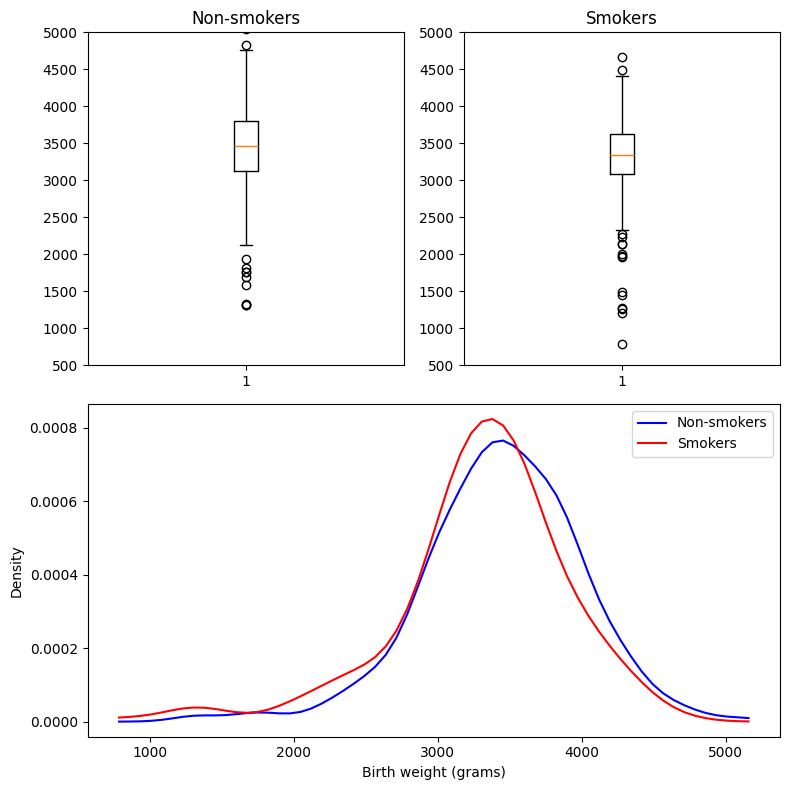

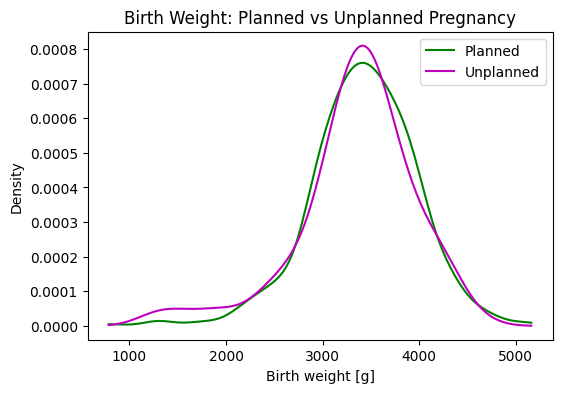

In [6]:
# Problem 4: Distributions of given data

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the data file
birth = np.loadtxt('birth.dat')

# Define filters for smoking habits (column 20 = index 19)
non_smokers = (birth[:, 19] < 3)   # 1 or 2 means non-smoker
smokers = (birth[:, 19] == 3)      # 3 means smoker

# Extract birth weights (column 3 = index 2)
x = birth[non_smokers, 2]  # weights for non-smoking mothers
y = birth[smokers, 2]      # weights for smoking mothers

# Remove missing (NaN) values if any
x = x[~np.isnan(x)]
y = y[~np.isnan(y)]

###########################################################
# Sample sizes
n_x = x.size # gives number of elements
n_y = y.size
print("Sample sizes: non-smokers n_x =", n_x, ", smokers n_y =", n_y)

# Summary stats
mean_x, mean_y = np.mean(x), np.mean(y)
med_x, med_y = np.median(x), np.median(y)
sd_x, sd_y = np.std(x, ddof=1), np.std(y, ddof=1)
print(f"non-smokers: mean={mean_x:.1f}, median={med_x:.1f}, sd={sd_x:.1f}")
print(f"smokers:     mean={mean_y:.1f}, median={med_y:.1f}, sd={sd_y:.1f}")
############################################################

# Plot boxplots to compare distributions
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.boxplot(x)
plt.title('Non-smokers')
plt.axis([0, 2, 500, 5000])

plt.subplot(2, 2, 2)
plt.boxplot(y)
plt.title('Smokers')
plt.axis([0, 2, 500, 5000])

# Compute and plot kernel density estimates (smooth curves)
kde_x = stats.gaussian_kde(x)
kde_y = stats.gaussian_kde(y)

grid = np.linspace(np.min(birth[:, 2]), np.max(birth[:, 2]), 60)

plt.subplot(2, 2, (3, 4))
plt.plot(grid, kde_x(grid), 'b', label='Non-smokers')
plt.plot(grid, kde_y(grid), 'r', label='Smokers')
plt.xlabel('Birth weight (grams)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

######################################################

# Example: Another categorical variable, e.g., planned vs unplanned pregnancy
planned = (birth[:, 18] == 1)   # assuming column 19 (index 18) = pregnancy planned
unplanned = (birth[:, 18] != 1)

bw_planned = birth[planned, 2]
bw_unplanned = birth[unplanned, 2]

bw_planned = bw_planned[~np.isnan(bw_planned)]
bw_unplanned = bw_unplanned[~np.isnan(bw_unplanned)]

kde_planned = stats.gaussian_kde(bw_planned)
kde_unplanned = stats.gaussian_kde(bw_unplanned)

grid = np.linspace(np.nanmin(birth[:, 2]), np.nanmax(birth[:, 2]), 200)

plt.figure(figsize=(6, 4))
plt.plot(grid, kde_planned(grid), 'g', label='Planned')
plt.plot(grid, kde_unplanned(grid), 'm', label='Unplanned')
plt.xlabel("Birth weight [g]")
plt.ylabel("Density")
plt.title("Birth Weight: Planned vs Unplanned Pregnancy")
plt.legend()
plt.show()



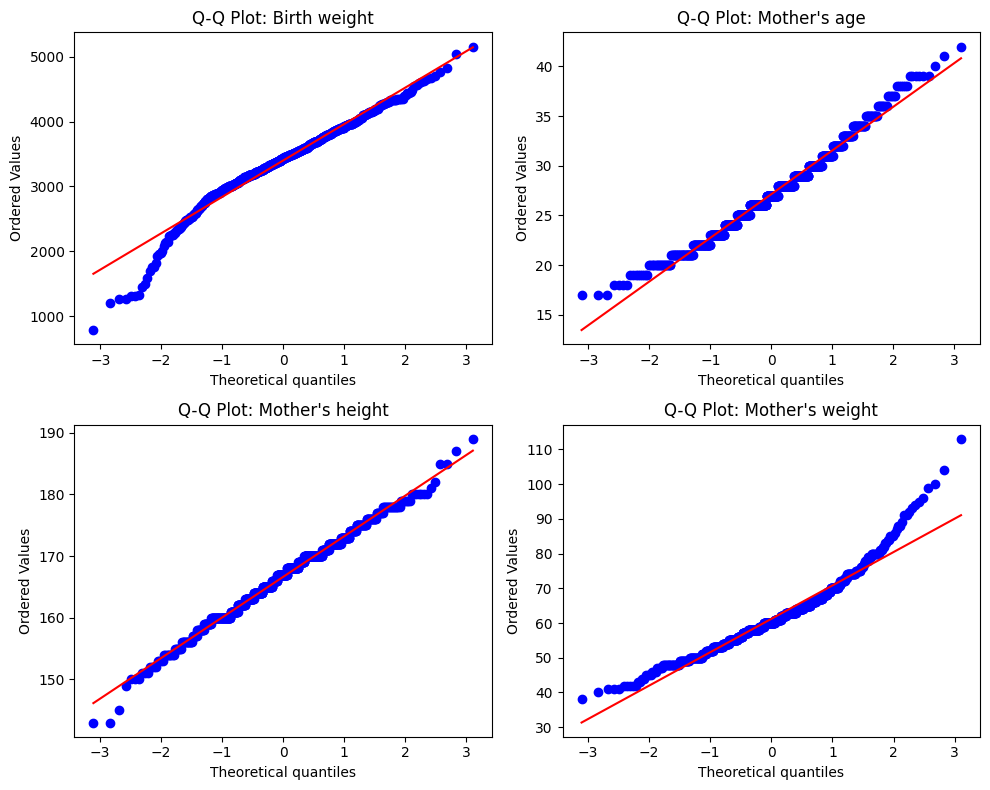

Jarque–Bera Test (alpha = 0.05)

Birth weight: JB = 190.52, p = 0.0000 --> Not Normal
Mother's age: JB = 18.54, p = 0.0001 --> Not Normal
Mother's height: JB = 4.83, p = 0.0895 --> Normal
Mother's weight: JB = 279.40, p = 0.0000 --> Not Normal


In [7]:
# Problem 5 (Old)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the birth data
birth = np.loadtxt("birth.dat")

# Define the variables
variables = {
    "Birth weight": birth[:, 2],
    "Mother's age": birth[:, 3],
    "Mother's height": birth[:, 15],
    "Mother's weight": birth[:, 14]
}

# 1) Visual inspection using Q-Q plots
plt.figure(figsize=(10, 8))
for i, (name, data) in enumerate(variables.items(), start=1):
    clean_data = data[~np.isnan(data)]  # remove NaNs
    plt.subplot(2, 2, i)
    _ = stats.probplot(clean_data, plot=plt)
    plt.title(f"Q-Q Plot: {name}")

plt.tight_layout()
plt.show()

# 2) Statistical test using Jarque–Bera
alpha = 0.05
print("Jarque–Bera Test (alpha = 0.05)\n")
for name, data in variables.items():
    clean_data = data[~np.isnan(data)]
    jb_stat, p_value = stats.jarque_bera(clean_data)
    normality = "Normal" if p_value > alpha else "Not Normal"
    print(f"{name}: JB = {jb_stat:.2f}, p = {p_value:.4f} --> {normality}")

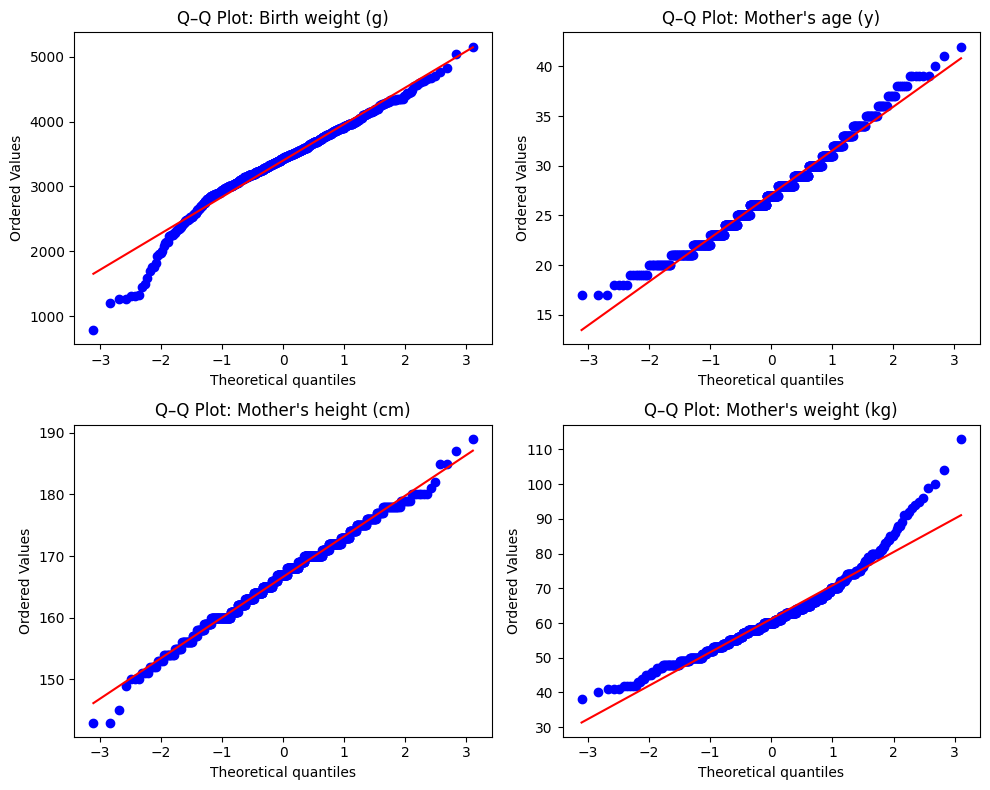

Jarque–Bera Test of Normality (α = 0.05)

Birth weight (g) (n=747): skew=-0.7264, kurtosis=5.0263 (excess 2.0263), JB=190.52, p=4.262e-42 → Not normal
Mother's age (y) (n=747): skew=0.3866, kurtosis=2.9929 (excess -0.0071), JB=18.54, p=9.415e-05 → Not normal
Mother's height (cm) (n=730): skew=-0.1546, kurtosis=3.2620 (excess 0.2620), JB=4.83, p=0.08945 → Normal
Mother's weight (kg) (n=726): skew=1.0017, kurtosis=5.3130 (excess 2.3130), JB=279.40, p=2.131e-61 → Not normal


In [8]:
# Problem 5 – Test of Normality (Updated)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the dataset
birth = np.loadtxt("birth.dat")

# Correct column mapping
variables = {
    "Birth weight (g)"       : birth[:, 2],
    "Mother's age (y)"       : birth[:, 3],
    "Mother's height (cm)"   : birth[:, 15], 
    "Mother's weight (kg)"   : birth[:, 14] 
}

alpha = 0.05

# 1) Visual inspection with Q–Q plots
plt.figure(figsize=(10, 8))
for i, (name, data) in enumerate(variables.items(), start=1):
    clean = data[~np.isnan(data)]  # remove NaN values
    plt.subplot(2, 2, i)
    _ = stats.probplot(clean, plot=plt)
    plt.title(f"Q–Q Plot: {name}")

plt.tight_layout()
plt.show()

# 2) Jarque–Bera normality test with skewness and kurtosis diagnostics
print("Jarque–Bera Test of Normality (α = 0.05)\n")

for name, data in variables.items():
    clean = data[~np.isnan(data)]
    n = clean.size

    # Skewness and kurtosis
    skew = stats.skew(clean, bias=False)
    kurt_excess = stats.kurtosis(clean, fisher=True, bias=False)  # excess kurtosis
    kurt_raw = kurt_excess + 3.0  # raw kurtosis

    # Jarque–Bera test
    jb_stat, jb_p = stats.jarque_bera(clean)
    normality = "Normal" if jb_p > alpha else "Not normal"

    print(f"{name} (n={n}): "
          f"skew={skew:.4f}, kurtosis={kurt_raw:.4f} (excess {kurt_excess:.4f}), "
          f"JB={jb_stat:.2f}, p={jb_p:.4g} → {normality}")


In [ ]:
### Problem 6 — Confidence interval for the difference in mean birth weight
import numpy as np
from scipy import stats

# Load the data file
birth = np.loadtxt('birth.dat')

# Define masks for non-smokers and smokers
non_smokers = (birth[:, 19] < 3)   # column 20 in file → index 19
smokers = (birth[:, 19] == 3)

# Extract the birth weights (column 3 → index 2)
x = birth[non_smokers, 2]
y = birth[smokers, 2]

# Remove NaN values
x = x[~np.isnan(x)]
y = y[~np.isnan(y)]

# Sample sizes and statistics
n_x, n_y = len(x), len(y)
mean_x, mean_y = np.mean(x), np.mean(y)
std_x, std_y = np.std(x, ddof=1), np.std(y, ddof=1)

# Difference in sample means (non-smoker − smoker)
diff = mean_x - mean_y

# Standard error of the difference
SE_diff = np.sqrt(std_x**2 / n_x + std_y**2 / n_y)

# Welch–Satterthwaite degrees of freedom
df = (std_x**2/n_x + std_y**2/n_y)**2 / (
      (std_x**2/n_x)**2/(n_x - 1) + (std_y**2/n_y)**2/(n_y - 1)
     )

# 95% confidence interval
alpha = 0.05
t_crit = stats.t.ppf(1 - alpha/2, df)
lower = diff - t_crit * SE_diff
upper = diff + t_crit * SE_diff

# Welch two-sample t-test (Since the 2 groups may have different variances and sample sizes)
t_stat, p_value = stats.ttest_ind(x, y, equal_var=False)

print("=== Problem 6: Difference in Mean Birth Weight ===")
print(f"n_x = {n_x}, n_y = {n_y}")
print(f"Mean (non-smokers) = {mean_x:.2f} g")
print(f"Mean (smokers)     = {mean_y:.2f} g")
print(f"Difference in means = {diff:.2f} g")
print(f"Standard error      = {SE_diff:.2f} g")
print(f"Degrees of freedom  ≈ {df:.1f}")
print(f"95% CI = [{lower:.2f}, {upper:.2f}] g")
print(f"t = {t_stat:.2f},  p-value = {p_value:.4f}")


=== Problem 6: Difference in Mean Birth Weight ===
n_x = 519, n_y = 222
Mean (non-smokers) = 3443.66 g
Mean (smokers)     = 3298.99 g
Difference in means = 144.67 g
Standard error      = 46.93 g
Degrees of freedom  ≈ 387.4
95% CI = [52.41, 236.94] g
t = 3.08,  p-value = 0.0022


Estimated beta: [-6.78027783e+02  3.44076963e-01]
Confidence intervals for beta: [[-7.00964880e+02 -6.55090686e+02]
 [ 3.32620830e-01  3.55533097e-01]]


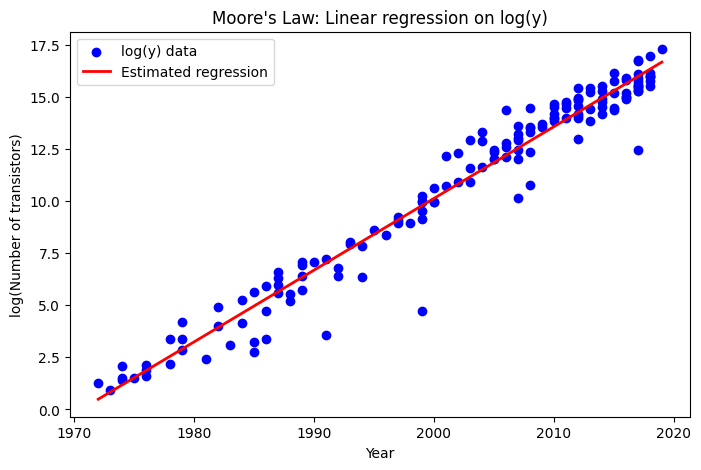

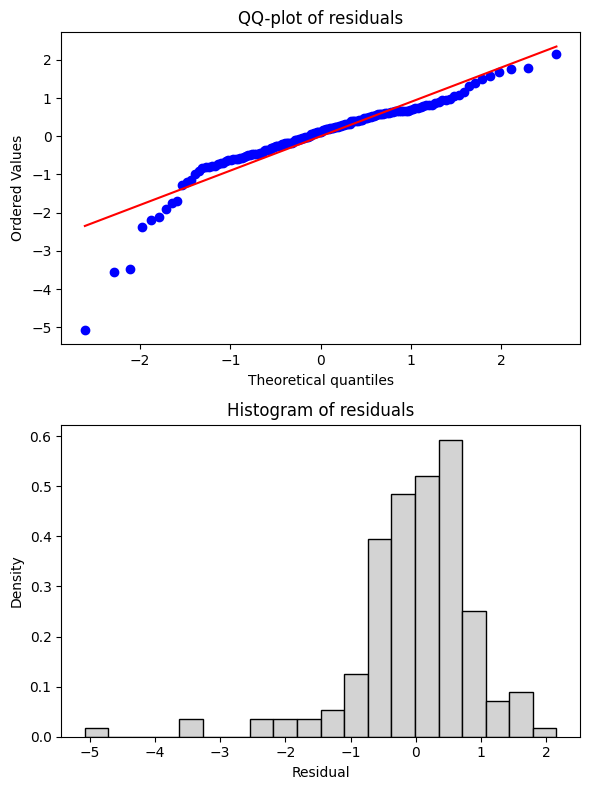

Predicted number of transistors in 2025: 135986734


In [10]:
# Problem 7

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tools

# Load the data
data = np.loadtxt("moore.dat")
x = data[:, 0]  # Year
y = data[:, 1]  # Number of transistors per unit area

# Transform y to log-scale
w = np.log(y)

# Construct the design matrix X with a column of ones for the intercept
X = np.column_stack((np.ones(len(x)), x))

# Estimate beta using OLS regression from tools.py
beta_hat, beta_int = tools.regress(X, w)

print("Estimated beta:", beta_hat)
print("Confidence intervals for beta:", beta_int)

# Predicted log(y)
w_hat = X @ beta_hat

# Plot original data and estimated model
plt.figure(figsize=(8, 5))
plt.scatter(x, np.log(y), color='blue', label='log(y) data')
plt.plot(x, w_hat, color='red', lw=2, label='Estimated regression')
plt.xlabel("Year")
plt.ylabel("log(Number of transistors)")
plt.title("Moore's Law: Linear regression on log(y)")
plt.legend()
plt.show()

# Residuals
res = w - w_hat

# Plot residuals: QQ plot + histogram
plt.figure(figsize=(6, 8))

plt.subplot(2, 1, 1)
_ = stats.probplot(res, plot=plt)
plt.title("QQ-plot of residuals")

plt.subplot(2, 1, 2)
plt.hist(res, bins=20, density=True, color='lightgray', edgecolor='black')
plt.title("Histogram of residuals")
plt.xlabel("Residual")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

# Prediction for 2025
year_2025 = 2025
X_2025 = np.array([1, year_2025])
log_y_2025 = X_2025 @ beta_hat
y_2025 = np.exp(log_y_2025)

print(f"Predicted number of transistors in 2025: {y_2025:.0f}")
